# Data Plotting


In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Loads nicard and scope
manager.startModule('logic','cavitylogic')
import glob
import os

In [2]:
#os.chdir(r'C:\Users\rasjen\BitTorrentSyncDrive\Personal - Rasmus\Rasmus notes\Measurements\test')
os.chdir(r'C:\BittorrentSyncDrive\Personal - Rasmus\Rasmus notes\Measurements\170921_position2_4')
filenames = glob.glob('./*_sweep_data.dat')
print(filenames)

fileNum=-3
cavitylogic._load_full_sweep(filepath='', filename=filenames[fileNum])
cavitylogic._get_ramp_up_signgals()
print(filenames[fileNum])

['.\\2017-09-21_134306_1_full_sweep_data.dat', '.\\2017-09-21_134450_1_full_sweep_data.dat', '.\\2017-09-21_134930_1_full_sweep_data.dat', '.\\2017-09-21_135113_1_full_sweep_data.dat', '.\\2017-09-21_135229_1_full_sweep_data.dat', '.\\2017-09-21_135336_1_full_sweep_data.dat', '.\\2017-09-21_140045_1_full_sweep_data.dat', '.\\2017-09-21_140428_1_full_sweep_data.dat', '.\\2017-09-21_141238_1_full_sweep_data.dat', '.\\2017-09-21_141548_1_full_sweep_data.dat', '.\\2017-09-21_142400_1_full_sweep_data.dat', '.\\2017-09-21_142839_1_full_sweep_data.dat']
.\2017-09-21_141548_1_full_sweep_data.dat


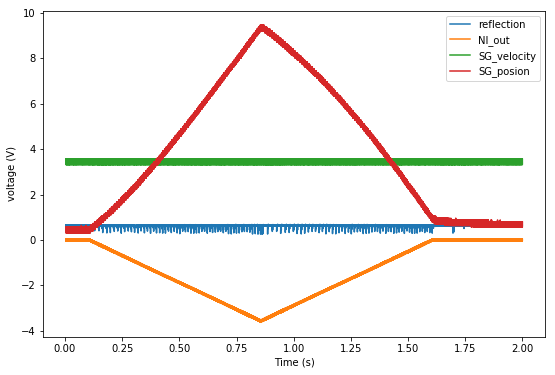

In [3]:
labels = ['reflection', 'NI_out', 'SG_velocity', 'SG_posion']
for i in range(4):
    plt.plot(cavitylogic.time,cavitylogic.volts[i], label = labels[i])
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('voltage (V)')
plt.show()

In [4]:
cavitylogic._get_ramp_up_signgals()

0

In [15]:
cavitylogic.RampUp_signalSG_polyfit = cavitylogic._polyfit_SG(xdata=cavitylogic.RampUp_time,ydata=cavitylogic.RampUp_signalSG,order=3)

In [16]:
resonances = cavitylogic._peak_search(cavitylogic.RampUp_signalR)
corrected_resonances = cavitylogic._find_missing_resonances(resonances)

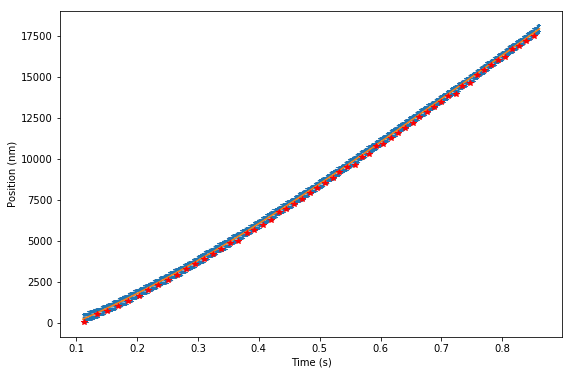

In [17]:
plt.plot(cavitylogic.RampUp_time, cavitylogic.RampUp_signalSG/10*20*1e3, 'x-', markersize=0.3, linewidth=0.05)
plt.plot(cavitylogic.RampUp_time, cavitylogic.RampUp_signalSG_polyfit/10*20*1e3)
plt.plot(cavitylogic.RampUp_time[resonances], cavitylogic.RampUp_signalSG[resonances]/10*20*1e3, '*', color='r')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (nm)')
#plt.ylim([14700,15300])
#plt.xlim([0.75,0.755])
plt.show()

In [20]:
cavitylogic.volts[0,21000:21300]

array([ 0.608,  0.592,  0.608,  0.592,  0.608,  0.592,  0.608,  0.592,
        0.608,  0.592,  0.604,  0.592,  0.604,  0.592,  0.608,  0.592,
        0.608,  0.592,  0.608,  0.592,  0.604,  0.592,  0.608,  0.592,
        0.608,  0.588,  0.608,  0.592,  0.608,  0.592,  0.608,  0.592,
        0.608,  0.592,  0.608,  0.592,  0.604,  0.592,  0.604,  0.592,
        0.608,  0.592,  0.604,  0.592,  0.604,  0.592,  0.604,  0.592,
        0.608,  0.592,  0.608,  0.592,  0.604,  0.592,  0.608,  0.592,
        0.608,  0.592,  0.608,  0.592,  0.604,  0.592,  0.604,  0.592,
        0.608,  0.592,  0.604,  0.592,  0.608,  0.592,  0.604,  0.592,
        0.608,  0.592,  0.604,  0.592,  0.608,  0.592,  0.608,  0.592,
        0.608,  0.592,  0.608,  0.592,  0.608,  0.592,  0.608,  0.592,
        0.608,  0.592,  0.608,  0.592,  0.608,  0.592,  0.608,  0.592,
        0.608,  0.592,  0.604,  0.592,  0.608,  0.592,  0.608,  0.592,
        0.608,  0.592,  0.604,  0.592,  0.604,  0.592,  0.608,  0.592,
      